<a href="https://colab.research.google.com/github/Sushan9706/Concepts-and-Technologies-of-AI/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/worksheet3/diabetes_.csv')

#1. load data
df.head()
df.info()
df.describe()


# 2. Handle Missing Data:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())
df.isnull().sum()

#3.
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

train = indices[:train_size]
test = indices[train_size:]

X_train, X_test = X[train], X[test]
y_train, y_test = y[train], y[test]
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#4.
# Euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


# Predict class for a single query
def knn_predict_single(X_train, y_train, query, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], query)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])

    k_nearest = distances[:k]
    labels = [label for _, label in k_nearest]

    return max(set(labels), key=labels.count)


# Predict classes for all test samples
def knn_predict(X_train, y_train, X_test, k):
    predictions = []

    for x in X_test:
        predictions.append(knn_predict_single(X_train, y_train, x, k))

    return np.array(predictions)


# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


# Run KNN
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)
acc_original = accuracy(y_test, y_pred)

print("Accuracy:", acc_original)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)
Accuracy: 0.7359307359307359


In [6]:
# Problem - 2 - Experimentation:
# 1. Repeat the Classification Task:
# • Scale the Feature matrix X.
# • Use the scaled data for training and testing the kNN Classifier.
# • Record the results.
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = min_max_scale(X)
X_train_scaled = X_scaled[train]
X_test_scaled = X_scaled[test]
y_pred_scaled = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
print("Accuracy with scaled data:", acc_scaled)
# 2. Comparative Analysis: Compare the Results -
# • Compare the accuracy and performance of the kNN model on the original dataset from problem 1
# versus the scaled dataset.
# • Discuss:
# – How scaling impacted the KNN performance.
# – The reason for any observed changes in accuracy.
print("Accuracy on original data:", acc_original)
print("Accuracy on scaled data:  ", acc_scaled)

if acc_scaled > acc_original:
    print("\nScaling improved KNN performance.")
elif acc_scaled < acc_original:
    print("\nScaling decreased KNN performance.")
else:
    print("\nScaling did not change KNN performance.")

Accuracy with scaled data: 0.7575757575757576
Accuracy on original data: 0.7359307359307359
Accuracy on scaled data:   0.7575757575757576

Scaling improved KNN performance.


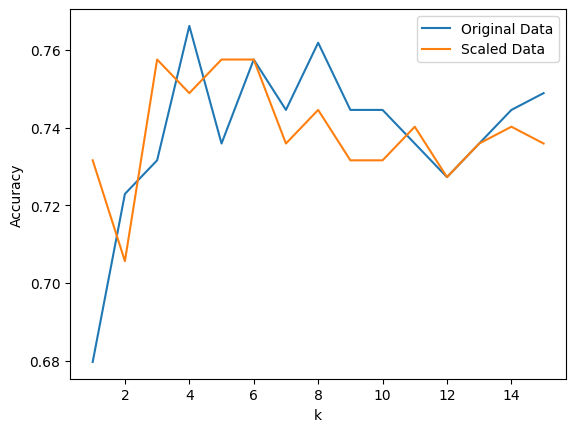

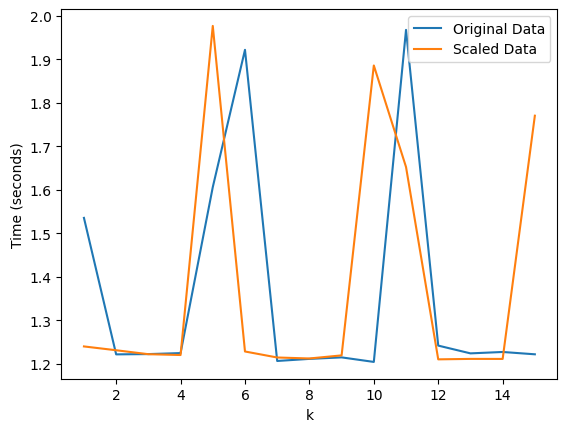

In [7]:
# Problem - 3 - Experimentation with k:
# 1. Vary the number of neighbors - k:
# • Run the KNN model on both the original and scaled datasets for a range of:
# k= 1, 2, 3, . . . 15
# • For each k, record:
# – Accuracy.
# – Time taken to make predictions.
import time
k_values = range(1, 16)

# Lists to store results
acc_original_list = []
acc_scaled_list = []
time_original_list = []
time_scaled_list = []

for k in k_values:
    # Original data
    start = time.time()
    y_pred_orig = knn_predict(X_train, y_train, X_test, k)
    end = time.time()
    acc_original_list.append(accuracy(y_test, y_pred_orig))
    time_original_list.append(end - start)
    # Scaled data
    start = time.time()
    y_pred_scaled = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
    end = time.time()
    acc_scaled_list.append(accuracy(y_test, y_pred_scaled))
    time_scaled_list.append(end - start)
# – k vs. Accuracy for original and scaled datasets.
plt.figure()
plt.plot(k_values, acc_original_list, label='Original Data')
plt.plot(k_values, acc_scaled_list, label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# – k vs. Time Taken for original and scaled datasets.
plt.figure()
plt.plot(k_values, time_original_list, label='Original Data')
plt.plot(k_values, time_scaled_list, label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()